## Практическое задание №6

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg

### Задание 1.
Решите линейную систему.

In [6]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

### Задание 2.
Найдите псевдорешение:

x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15

In [12]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

/Users/nadejdaberzina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [13]:
np.dot(A, [1.13919353, -0.90498444, -0.9009803])

array([ 0.23020495,  7.03751835, 11.83650984,  6.78328856, 15.21805317])

### Задание 3.
Сколько решений имеет линейная система?

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [147]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A, B.T), axis=1)
print(C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


(2, 3)

Система не имеет решений, так как ранг исходной матрицы меньше ранга расширенной матрицы.

In [145]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[6, 9, 12]])
C = np.concatenate((A, B.T), axis=1)
print(C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[ 1  2  3  6]
 [ 4  5  6  9]
 [ 7  8  9 12]]


(2, 2)

Такая система будет совместной, так как ранг основной матрицы равен рангу расширенной матрицы. Система имеет бесконечное множество решений, так как ранг меньше числа неизвестных. Одно из возможных решений системы: x = 1, y = -5, z = 5.

### Задание 4.
Вычислите LU-разложение матрицы.

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [75]:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])
P, L, U = scipy.linalg.lu(A)

print("det A = ", np.linalg.det(A))
print("")
print(P)
print("")
print(L)
print("")
print(U)
print("")

B = np.array([1, 3, 5])
np.linalg.solve(A, B)

det A =  432.00000000000017

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]

[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]



array([ 0.84259259,  0.10648148, -0.01851852])

### Задание 5.
Найдите нормальное псевдорешение недоопределенной системы:

x + 2y – z = 1

8x – 5y + 2z = 12

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

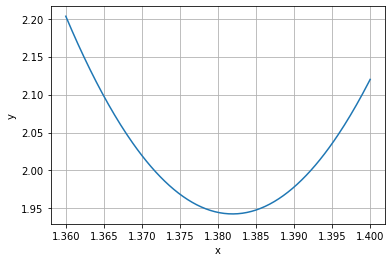

/Users/nadejdaberzina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

In [134]:
def Q(x, y, z):
    return(x**2 + y**2 + z**2)

x = np.linspace(1.36, 1.4, 201)

plt.plot(x, Q(x, 10 * x - 14, 21 * x - 29))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
np.linalg.lstsq(A, B)

### Задание 6.
Найдите одно из псевдорешений вырожденной системы.

Попробуйте также отыскать и нормальное псевдорешение.

In [150]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 11])

Q, R = np.linalg.qr(A)
print(A)
print("")
print(Q)
print("")
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]

[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [94]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [95]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [96]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [97]:
X = np.append(X1, 0)
print(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


Нормальное псевдорешение найти не получилось.